In [1]:
import csv
import pandas as pd
import pandas_datareader as pdr
from pandas import DataFrame
from math import log, sqrt, pi, exp
from datetime import datetime, date
from scipy import stats
import numpy as np
from scipy.sparse import csc_matrix
from scipy.stats import bernoulli
from scipy.optimize import fsolve
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
%matplotlib inline

In [2]:
VIX = pd.read_csv("VIX.csv", index_col = 'Date')
VIX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,16.770000,16.799999,15.98,16.190001,16.190001,0
2021-08-31,15.980000,17.070000,15.91,16.480000,16.480000,0
2021-09-01,16.059999,16.709999,15.68,16.110001,16.110001,0
2021-09-02,16.270000,16.980000,15.73,16.410000,16.410000,0
2021-09-03,16.270000,17.059999,16.08,16.410000,16.410000,0


In [3]:
VIXfix = pd.read_csv("VIX.csv")
VIXfix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,16.770000,16.799999,15.98,16.190001,16.190001,0
1,2021-08-31,15.980000,17.070000,15.91,16.480000,16.480000,0
2,2021-09-01,16.059999,16.709999,15.68,16.110001,16.110001,0
3,2021-09-02,16.270000,16.980000,15.73,16.410000,16.410000,0
4,2021-09-03,16.270000,17.059999,16.08,16.410000,16.410000,0


In [4]:
VIXpct = VIX['Adj Close'].pct_change()
VIXpct

Date
2021-08-30         NaN
2021-08-31    0.017912
2021-09-01   -0.022451
2021-09-02    0.018622
2021-09-03    0.000000
                ...   
2021-11-22    0.070352
2021-11-23    0.010955
2021-11-24   -0.041280
2021-11-26    0.540366
2021-11-29   -0.197764
Name: Adj Close, Length: 64, dtype: float64

In [5]:
SPX = pd.read_csv("HistoricalPrices.csv")
SPXsplit = SPX.drop(range(21,62))
SPXsplit

,Date,Open,High,Low,Adj Close
0,11/30/2021,4640.25,4646.02,4560.00,4567.00
1,11/29/2021,4628.75,4672.95,4625.26,4655.27
2,11/26/2021,4664.63,4664.63,4585.43,4594.62
3,11/24/2021,4675.78,4702.87,4659.89,4701.46
4,11/23/2021,4678.48,4699.39,4652.66,4690.70
5,11/22/2021,4712.00,4743.83,4682.17,4682.94
6,11/19/2021,4708.44,4717.75,4694.22,4697.96
7,11/18/2021,4700.72,4708.80,4672.78,4704.54
8,11/17/2021,4701.50,4701.50,4684.41,4688.67
9,11/16/2021,4679.42,4714.95,4679.42,4700.90


VIX and SPX have an inverse correlation. When the market is falling, volatility tends to rise, hence the VIX’s other name, the “fear index”. To better understand the exact correlation between SPX and VIX, we conducted a study (hey, our research team isn’t paid to sit around and just look pretty -- that compliment should buy me at least one favor from them)

In [6]:
close = SPXsplit['Adj Close']

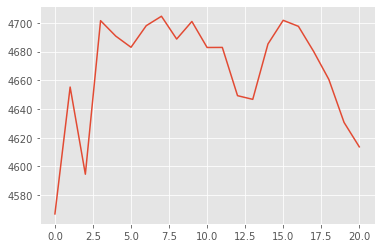

In [7]:
close.plot()
plt.show()

In [8]:
dailyspx = SPXsplit['Adj Close'].pct_change()
dailyspx

0          NaN
1     0.019328
2    -0.013028
3     0.023253
4    -0.002289
5    -0.001654
6     0.003207
7     0.001401
8    -0.003373
9     0.002608
10   -0.003850
11    0.000011
12   -0.007171
13   -0.000551
14    0.008294
15    0.003511
16   -0.000887
17   -0.003719
18   -0.004164
19   -0.006420
20   -0.003667
Name: Adj Close, dtype: float64

In [9]:
estimvol = 100*(dailyspx.std()*252**.5)
estimvol

13.385185602884903

In [10]:
ts1 = pd.Series(np.random.randn(1000)).cumsum()
ts1

0      0.031800
1     -0.134239
2     -0.534710
3     -0.118208
4      2.181668
         ...   
995    2.593271
996    2.304794
997    2.230078
998    2.378529
999    4.182567
Length: 1000, dtype: float64

<AxesSubplot:>

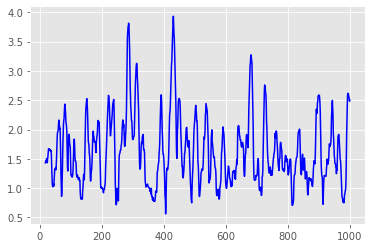

In [11]:
ts1.rolling(window=20).std().plot(style='b')

<AxesSubplot:>

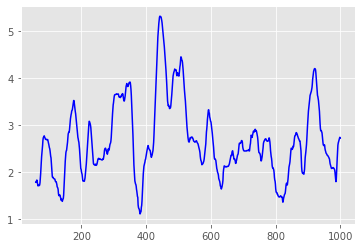

In [12]:
ts1.rolling(window=60).std().plot(style='b')

In [13]:
ts = SPXsplit.set_index('Date')
ts2 = ts['Adj Close']
ts2

Date
11/30/2021    4567.00
11/29/2021    4655.27
11/26/2021    4594.62
11/24/2021    4701.46
11/23/2021    4690.70
11/22/2021    4682.94
11/19/2021    4697.96
11/18/2021    4704.54
11/17/2021    4688.67
11/16/2021    4700.90
11/15/2021    4682.80
11/12/2021    4682.85
11/11/2021    4649.27
11/10/2021    4646.71
11/9/2021     4685.25
11/8/2021     4701.70
11/5/2021     4697.53
11/4/2021     4680.06
11/3/2021     4660.57
11/2/2021     4630.65
11/1/2021     4613.67
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

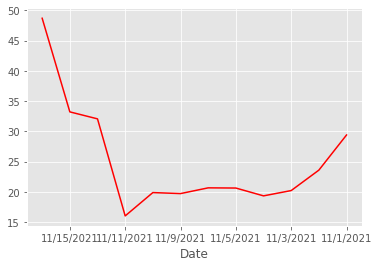

In [14]:
ts2.rolling(window=10).std().plot(style='r')

In [15]:
sma30 = close.rolling(window=5).mean()
sma30

0          NaN
1          NaN
2          NaN
3          NaN
4     4641.810
5     4664.998
6     4673.536
7     4695.520
8     4692.962
9     4695.002
10    4694.974
11    4691.952
12    4680.898
13    4672.506
14    4669.376
15    4673.156
16    4676.092
17    4682.250
18    4685.022
19    4674.102
20    4656.496
Name: Adj Close, dtype: float64

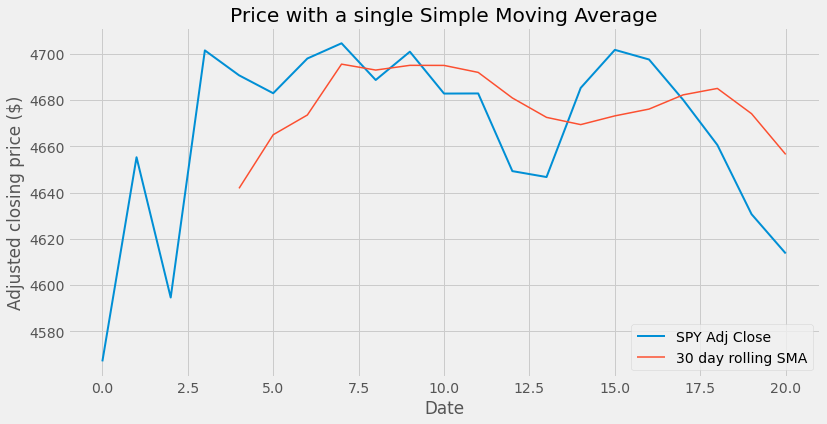

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma30, label='30 day rolling SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

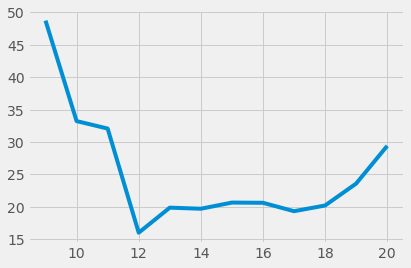

In [17]:
plt.plot(SPX['Adj Close'].rolling(10).std(),label= 'MA 9 days')

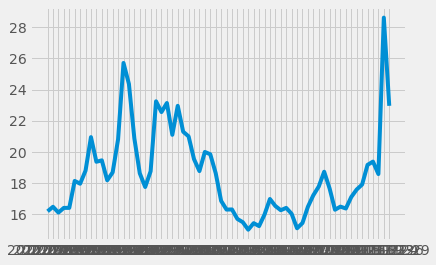

In [18]:
plt.plot(VIX['Adj Close'])

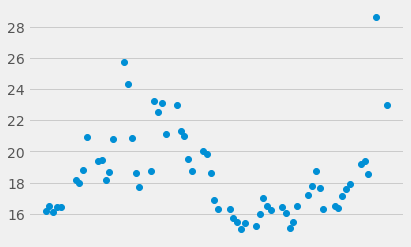

In [19]:
VIXfix.Date = pd.to_datetime(VIXfix.Date)

fig,ax = plt.subplots()
ax.plot_date(VIXfix.Date,VIXfix['Adj Close'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.show()

<AxesSubplot:xlabel='Date'>

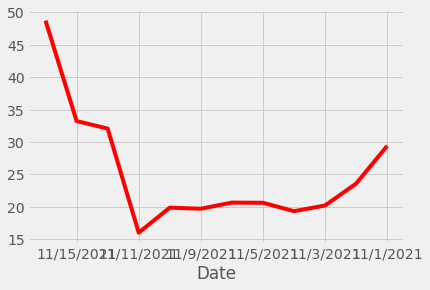

In [20]:
ts2.rolling(window=10).std().plot(style='r')

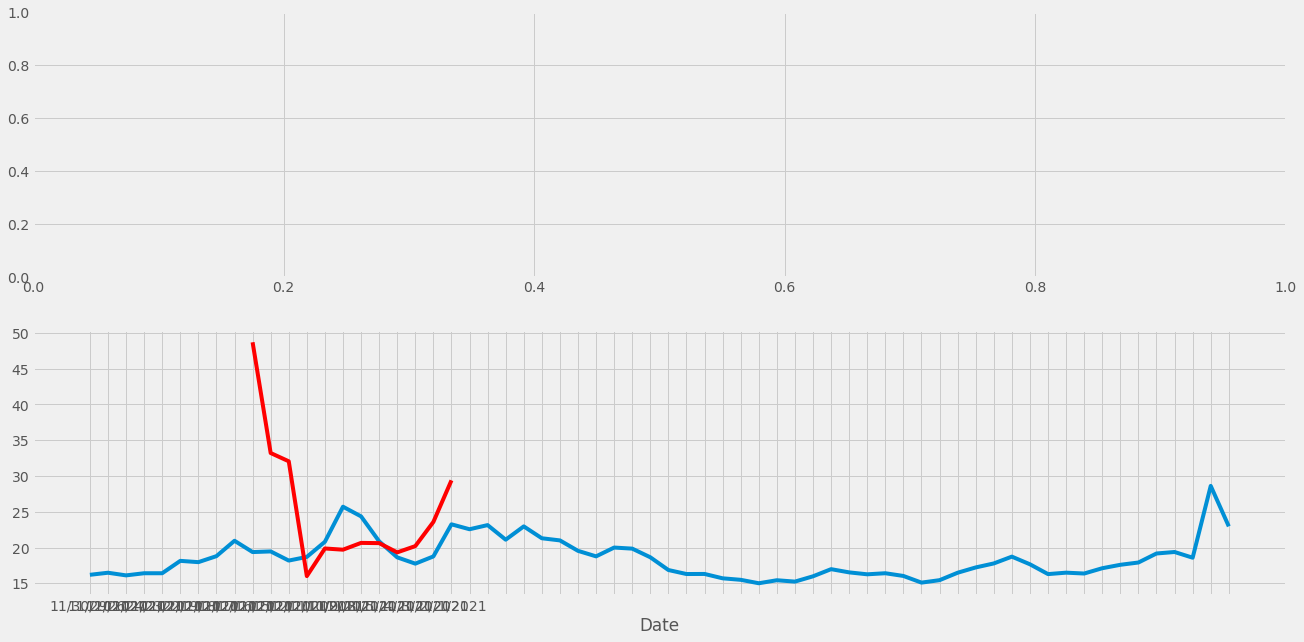

In [21]:
fig, ((ax1,ax2)) = plt.subplots(2,1)

ax1 = plt.plot(VIX['Adj Close'])

ax2 = ts2.rolling(window=10).std().plot(style='r',figsize=(20, 10))

In [22]:
import matplotlib.axes

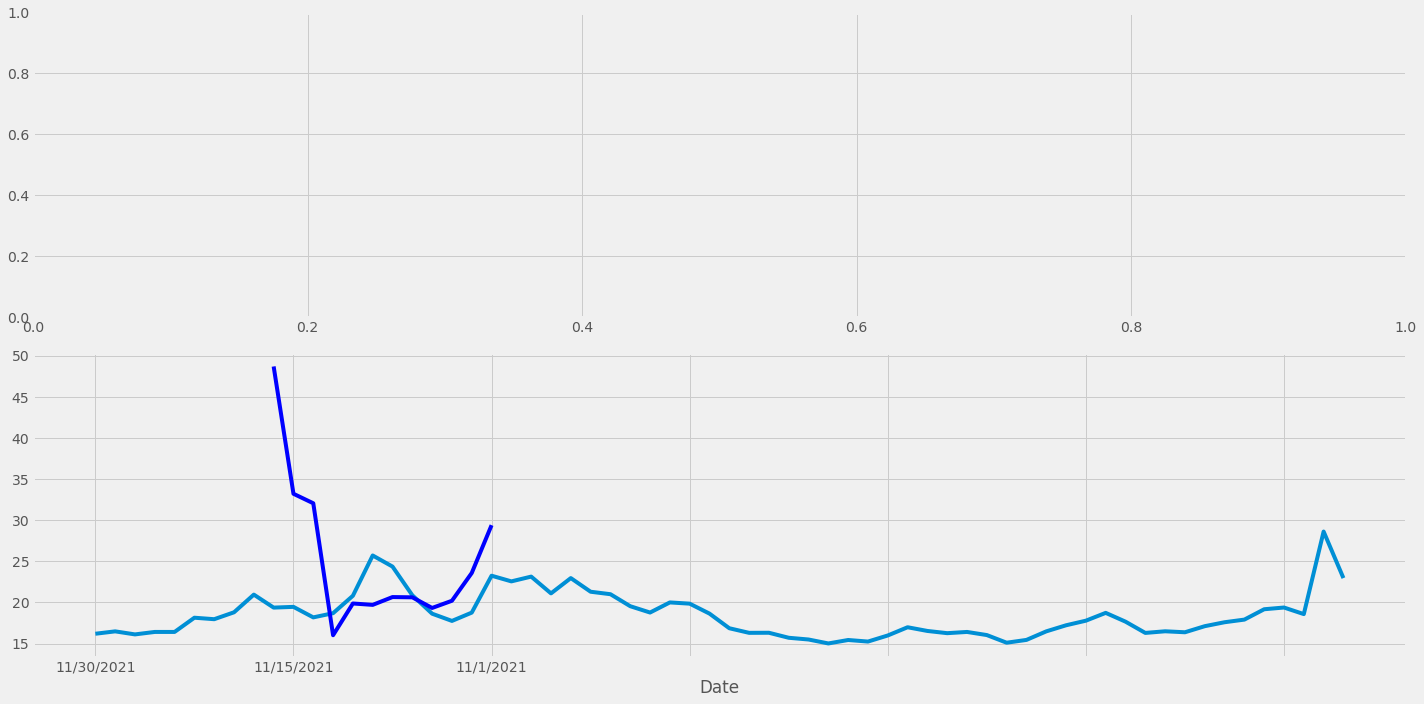

In [23]:
fig, ((ax1,ax2)) = plt.subplots(2,1)

ax1 = plt.plot(VIXfix['Adj Close'])

ax2 = ts2.rolling(window=10).std().plot(style='b',figsize=(20, 10))

VIXfix.Date = pd.to_datetime(VIXfix.Date)

ax.plot_date(VIXfix.Date,VIXfix['Adj Close'])

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

plt.draw()
plt.tight_layout()

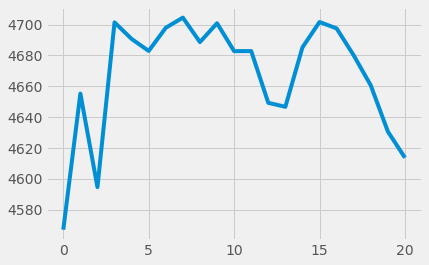

In [24]:
plt.plot(SPX['Adj Close'])

In [25]:
dailyspyberet = SPX['Adj Close'].pct_change()
dailyspyberet.head()

0         NaN
1    0.019328
2   -0.013028
3    0.023253
4   -0.002289
Name: Adj Close, dtype: float64

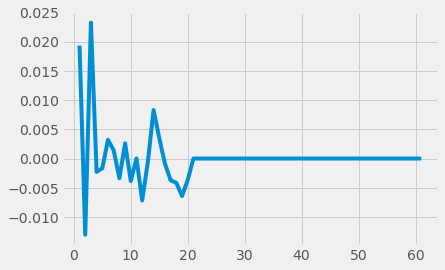

In [26]:
plt.plot(dailyspyberet)

In [27]:
VIXdate = VIXfix['Date']
VIXdate.head()
VIXclose = VIXfix['Adj Close']
VIXclose.head()

0    16.190001
1    16.480000
2    16.110001
3    16.410000
4    16.410000
Name: Adj Close, dtype: float64

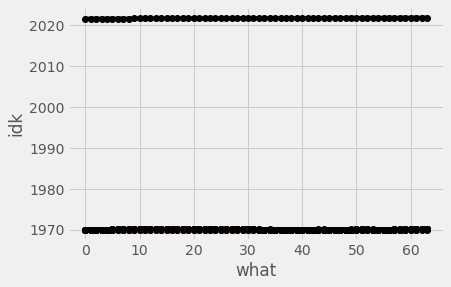

In [28]:
fig,ax=plt.subplots()
ax.plot(dailyspyberet, color='r', marker="o")
ax.set_xlabel("what")
ax.set_ylabel("idk")
ax.plot(VIXfix, color="k", marker="o")
plt.show()

In [30]:
SPY1 = pd.read_csv("SPY4.csv", index_col = 'Date')
SPY1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,452.559998,453.109985,451.549988,451.799988,450.357178,48721400
2021-09-02,453.320007,454.049988,451.910004,453.190002,451.742767,42501000
2021-09-03,451.980011,453.630005,451.549988,453.079987,451.633118,47170500
2021-09-07,452.709991,452.809998,450.739990,451.459991,450.018280,51671500
2021-09-08,450.890015,451.670013,448.859985,450.910004,449.470062,56181900


In [33]:
SPY1_close = pd.DataFrame(SPY1['Adj Close'])
SPY1_close

,Adj Close
Date,
2021-09-01,450.357178
2021-09-02,451.742767
2021-09-03,451.633118
2021-09-07,450.018280
2021-09-08,449.470062
...,...
2021-11-23,468.190002
2021-11-24,469.440002
2021-11-26,458.970001


In [40]:
dailySPYc = pd.DataFrame(SPY1_close['Adj Close'].pct_change())
dailySPYc.head()

,Adj Close
Date,
2021-09-01,NaN
2021-09-02,0.003077
2021-09-03,-0.000243
2021-09-07,-0.003576
2021-09-08,-0.001218


In [47]:
SPY1_close['MA_30'] = dailySPYc['Adj Close'].rolling(30).mean()
SPY1_close

,Adj Close,MA_30
Date,,
2021-09-01,450.357178,NaN
2021-09-02,451.742767,NaN
2021-09-03,451.633118,NaN
2021-09-07,450.018280,NaN
2021-09-08,449.470062,NaN
...,...,...
2021-11-23,468.190002,0.002571
2021-11-24,469.440002,0.002540
2021-11-26,458.970001,0.001236


In [54]:
SPY1_close['MA_30'] = SPY1_close['Adj Close'].rolling(30, center=True).mean()
SPY1_close['MA_10'] = SPY1_close['Adj Close'].rolling(10, center=True).mean()

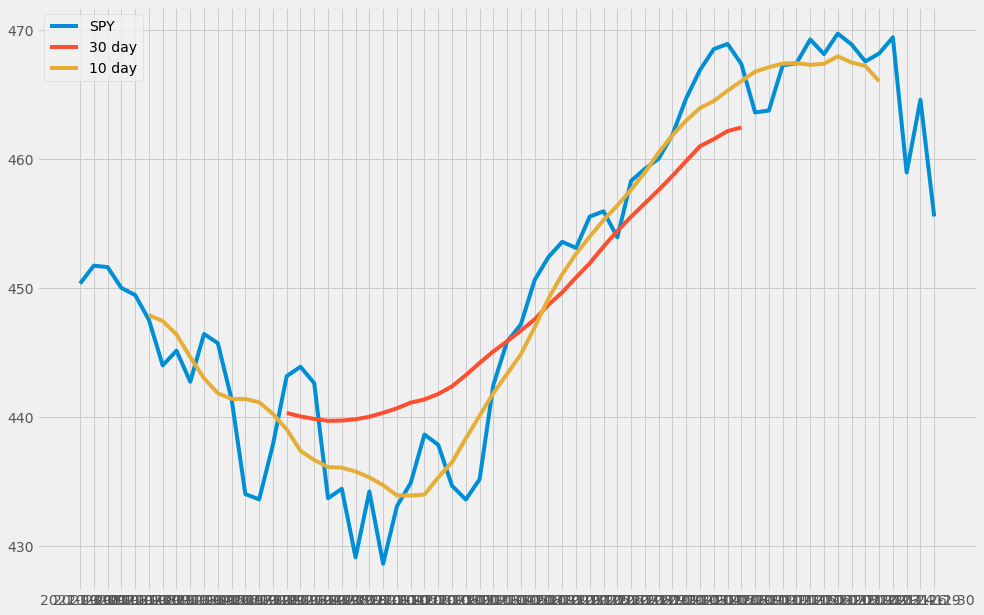

In [55]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(SPY1_close['Adj Close'],label='SPY')
plt.plot(SPY1_close['MA_30'], label='30 day')
plt.plot(SPY1_close['MA_10'], label='10 day')
plt.legend(loc=2)

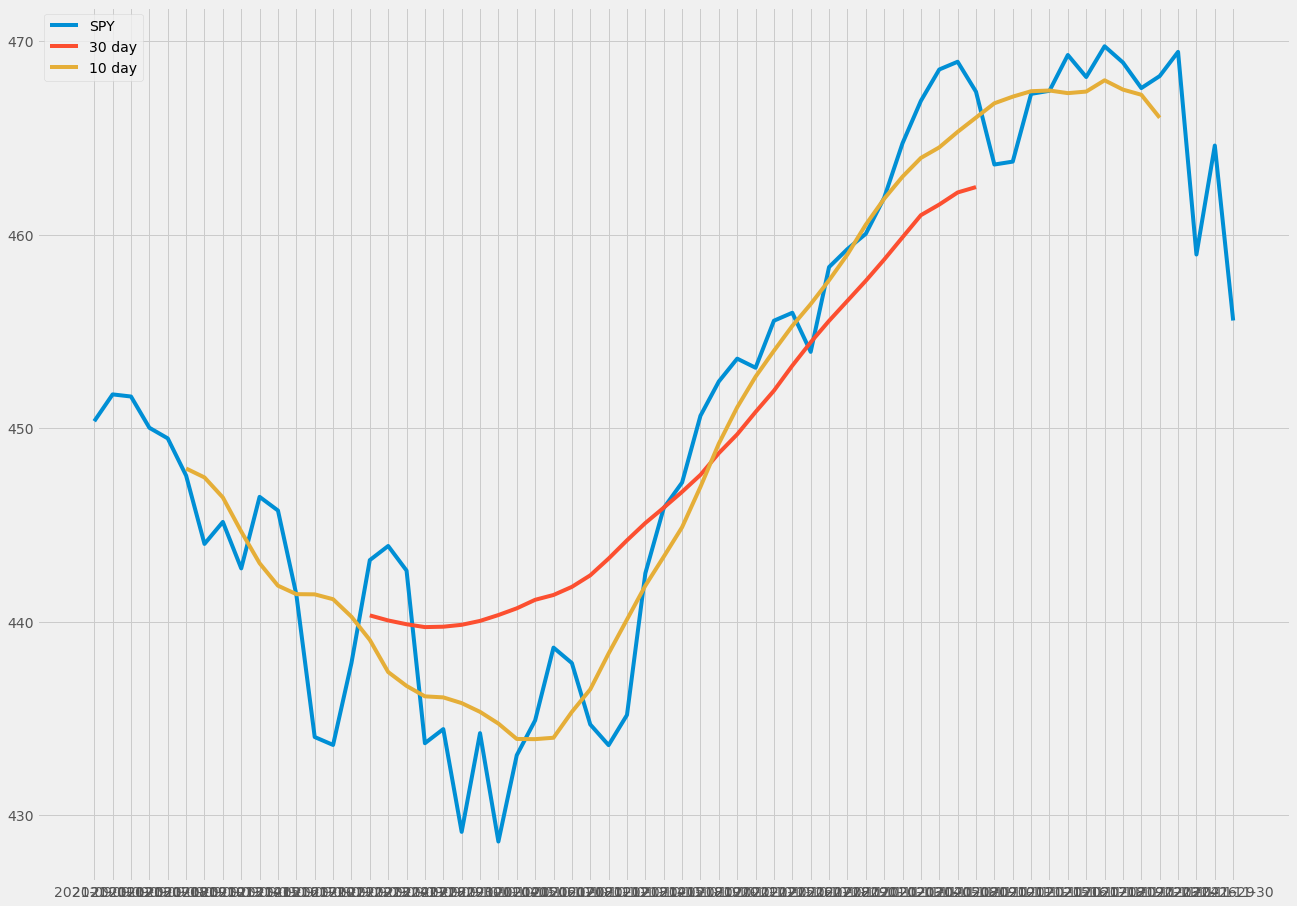

In [61]:
plt.figure(figsize=(20,15))
plt.grid(True)
plt.plot(SPY1_close['Adj Close'], label='SPY')
plt.plot(SPY1_close['MA_30'], label='30 day')
plt.plot(SPY1_close['MA_10'], label='10 day')
plt.legend(loc=2)

In [63]:
SPY1_close['Change'] = np.log(SPY1_close['Adj Close'] / SPY1_close['Adj Close'].shift())

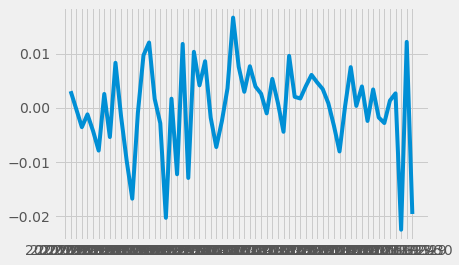

In [64]:
plt.plot(SPY1_close['Change'])

<AxesSubplot:xlabel='Date'>

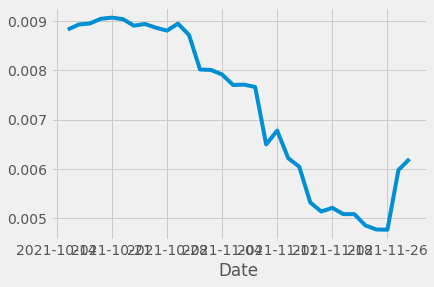

In [65]:
SPY1_close['Volatility'] = SPY1_close.Change.rolling(30).std().shift()
SPY1_close['Volatility'].plot()

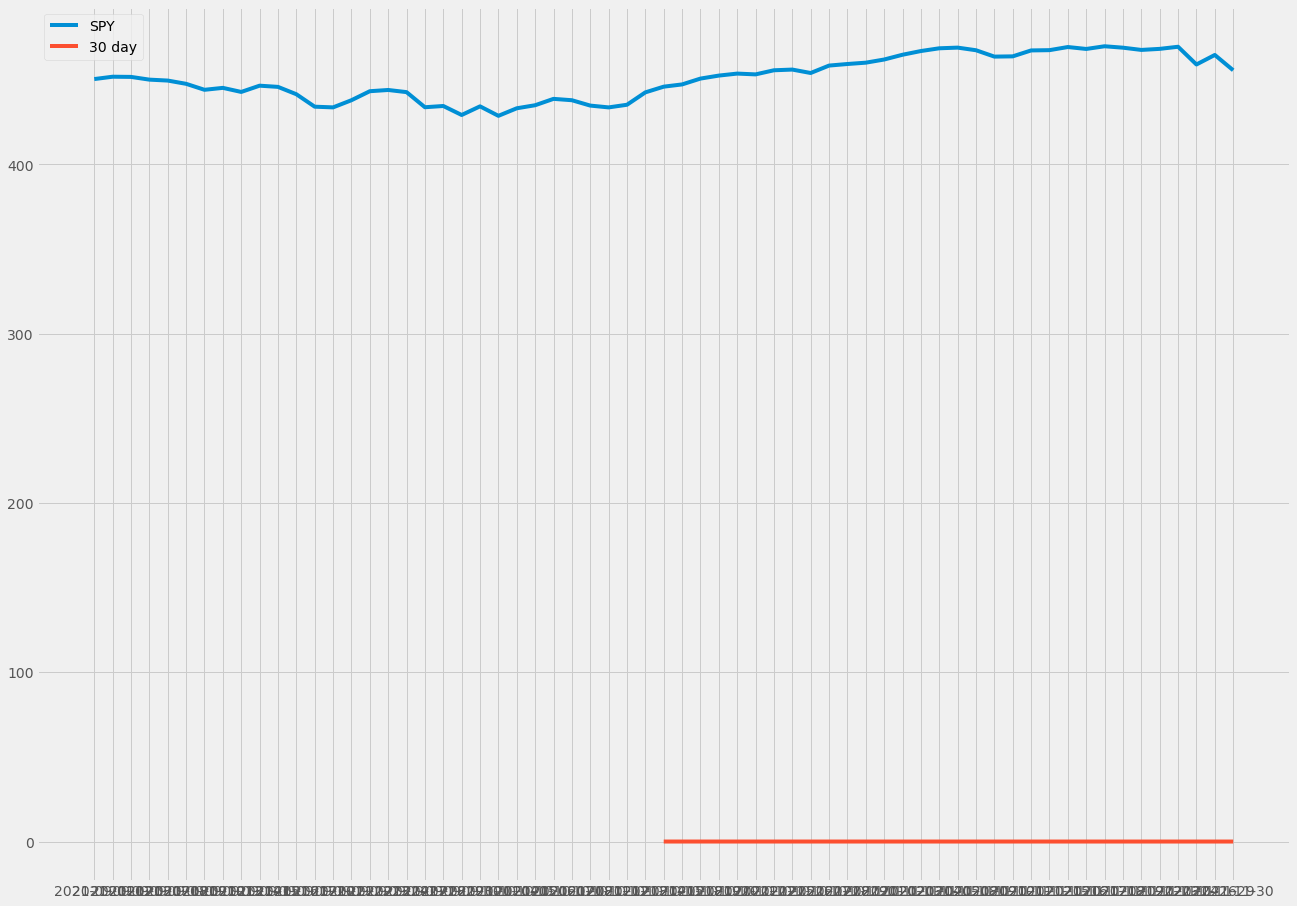

In [66]:
plt.figure(figsize=(20,15))
plt.grid(True)
plt.plot(SPY1_close['Adj Close'], label='SPY')
plt.plot(SPY1_close['Volatility'], label='30 day')
#plt.plot(VIX['Adj Close'], label='10 day')
plt.legend(loc=2)

In [67]:
SPY12 = pd.read_csv("SPY4.csv")
SPY12.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,452.559998,453.109985,451.549988,451.799988,450.357178,48721400
1,2021-09-02,453.320007,454.049988,451.910004,453.190002,451.742767,42501000
2,2021-09-03,451.980011,453.630005,451.549988,453.079987,451.633118,47170500
3,2021-09-07,452.709991,452.809998,450.739990,451.459991,450.018280,51671500
4,2021-09-08,450.890015,451.670013,448.859985,450.910004,449.470062,56181900


In [68]:
SPY12_close = pd.DataFrame(SPY12['Adj Close'])
SPY12_close

,Adj Close
0,450.357178
1,451.742767
2,451.633118
3,450.018280
4,449.470062
...,...
58,468.190002
59,469.440002
60,458.970001
61,464.600006


In [69]:
#dailySPYc = pd.DataFrame(SPY12_close['Adj Close'].pct_change())
#dailySPYc.head()

In [70]:
SPY12_close['MA_30'] = SPY12_close['Adj Close'].rolling(30, center=True).mean()
SPY12_close['MA_10'] = SPY12_close['Adj Close'].rolling(10, center=True).mean()

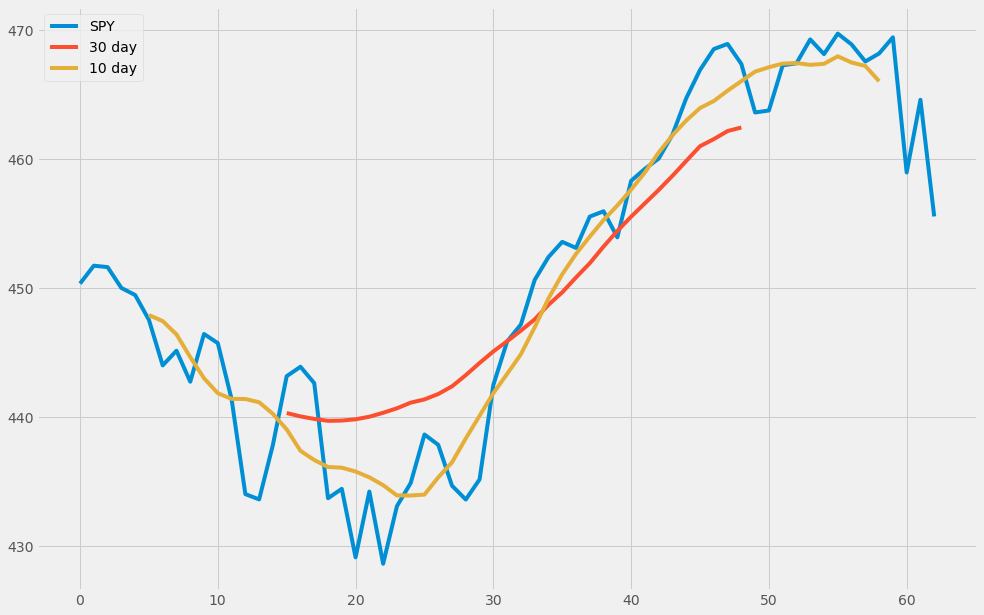

In [71]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(SPY12_close['Adj Close'],label='SPY')
plt.plot(SPY12_close['MA_30'], label='30 day')
plt.plot(SPY12_close['MA_10'], label='10 day')
plt.legend(loc=2)

In [75]:
SPY12_close['Change'] = np.log(SPY12_close['Adj Close'] / SPY12_close['Adj Close'].shift())

<AxesSubplot:>

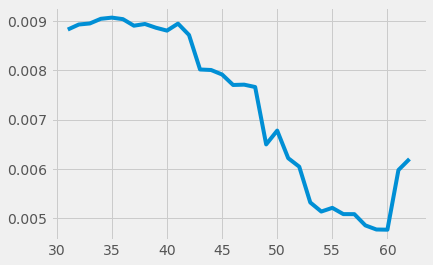

In [76]:
SPY12_close['Volatility'] = SPY12_close.Change.rolling(30).std().shift()
SPY12_close['Volatility'].plot()

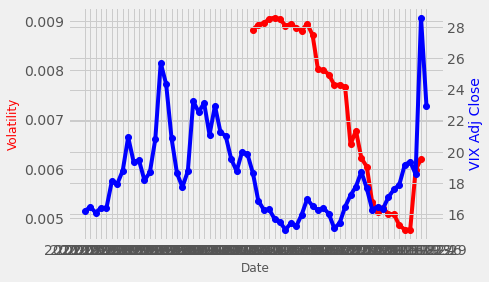

In [83]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(SPY12_close['Volatility'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=12)
# set y-axis label
ax.set_ylabel("Volatility",color="red",fontsize=12)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(VIX["Adj Close"],color="blue",marker="o")
ax2.set_ylabel("VIX Adj Close",color="blue",fontsize=14)
plt.show()

<AxesSubplot:>

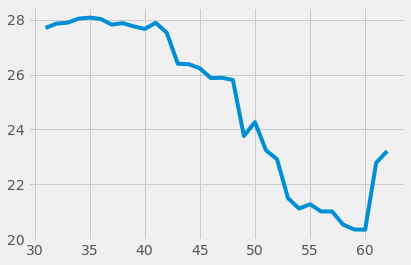

In [87]:
SPY12_close['Change'] = np.log(SPY12_close['Adj Close'] / SPY12_close['Adj Close'].shift())
SPY12_close['Volatility'] = np.sqrt(SPY12_close.Change.rolling(30).std().shift()*(252/29))*100
SPY12_close['Volatility'].plot()

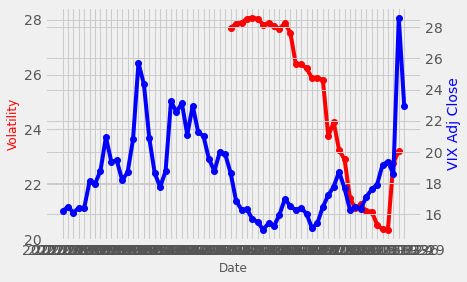

In [88]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(SPY12_close['Volatility'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=12)
# set y-axis label
ax.set_ylabel("Volatility",color="red",fontsize=12)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(VIX["Adj Close"],color="blue",marker="o")
ax2.set_ylabel("VIX Adj Close",color="blue",fontsize=14)
plt.show()